**Dataset Overview**

This dataset contains information about movies and TV shows available on Netflix, including content type, country of origin, rating, release year, and date added to the platform.

In [84]:
#importing all the important files 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#loading the dataset
df=pd.read_csv(r"netflix_titles.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


np.int64(0)

In [71]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [73]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Data Cleaning & Preparation**

- Missing values in `director`, `cast`, and `country` were replaced with "Unknown"
- These columns are categorical and not essential for numerical analysis
- Dropping rows would reduce dataset coverage and bias insights


In [87]:
#filling null data in the dataset
df.fillna({
    'director':"unknown",
    'cast':"unknown",
    'country':"unknown",
    'date_added':"unknown",
    'rating':"unknown",
    'duration':"unknown"
},inplace=True)


In [57]:
#checking if still any data is missing of keft unchecked
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [58]:
#finding which column has numerical values and is eligible for analysis
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1768,NaN,18,221,514,8775
top,s8807,Movie,Zubaan,unknown,unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [99]:
df.shape

(8807, 12)

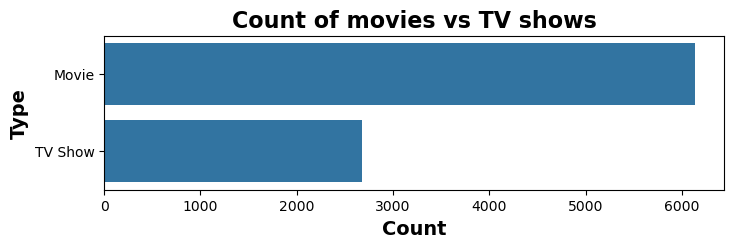

In [80]:
#comparision between movies and tv shows
plt.figure(figsize=(8,2))
sns.countplot(y='type', data=df)
plt.title('Count of movies vs TV shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Type', fontsize=14, fontweight='bold')
#setting the x-axis according to user/client easy understanding
# max_count=df['type'].value_counts().max()
# plt.xticks(range(0,max_count+500,500))
plt.show()

- Movies currently dominate Netflix’s content catalog.
- TV Shows show a consistent increase over time.
- The growing share of TV Shows indicates a shift toward binge-worthy and retention-driven content.

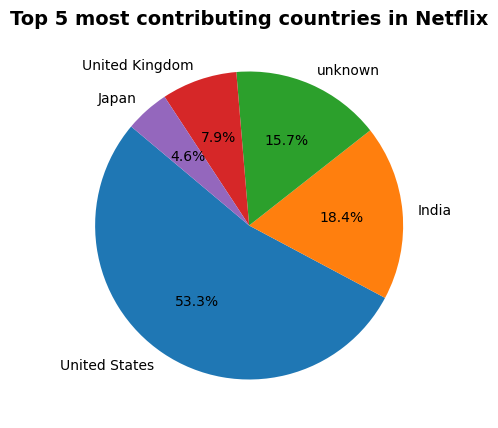

In [60]:
#finding which country is contributing more in the entertainment
plt.figure(figsize=(5,5))
top_countries = df['country'].value_counts().head(5)  #finds top 5 countries that have contributed in the netflix
plt.pie(
    top_countries.values,
    labels=top_countries.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Top 5 most contributing countries in netflix", fontsize=14, fontweight='bold')
plt.show()

- The United States contributes the highest number of titles to Netflix’s catalog.
- India, the United Kingdom, and Japan are key international content contributors.
- Netflix remains US-centric but is gradually expanding its global content footprint.

In [61]:
# finding all the unique values 
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'unknown', 'TV-Y7-FV', 'UR'], dtype=object)

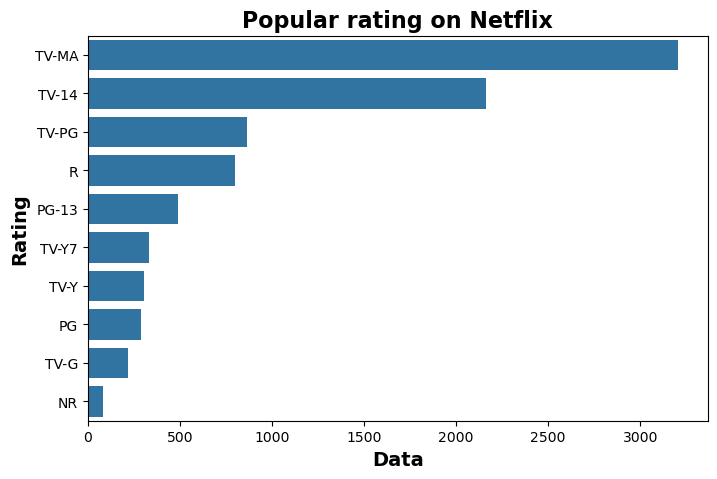

In [102]:
#which rating is more popluar in the netflix
top_genre = df['rating'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(
    x=top_genre.values,
    y=top_genre.index
)
plt.xlabel("Data", fontsize=14, fontweight='bold')
plt.ylabel("Rating", fontsize=14, fontweight='bold')
plt.title("Popular rating on Netflix", fontsize=16, fontweight='bold')
plt.show()

- Most Netflix content is rated TV-MA and TV-14.
- The platform primarily targets mature and young-adult audiences (13+).
- This rating distribution supports Netflix’s positioning as a premium, binge-focused streaming service.

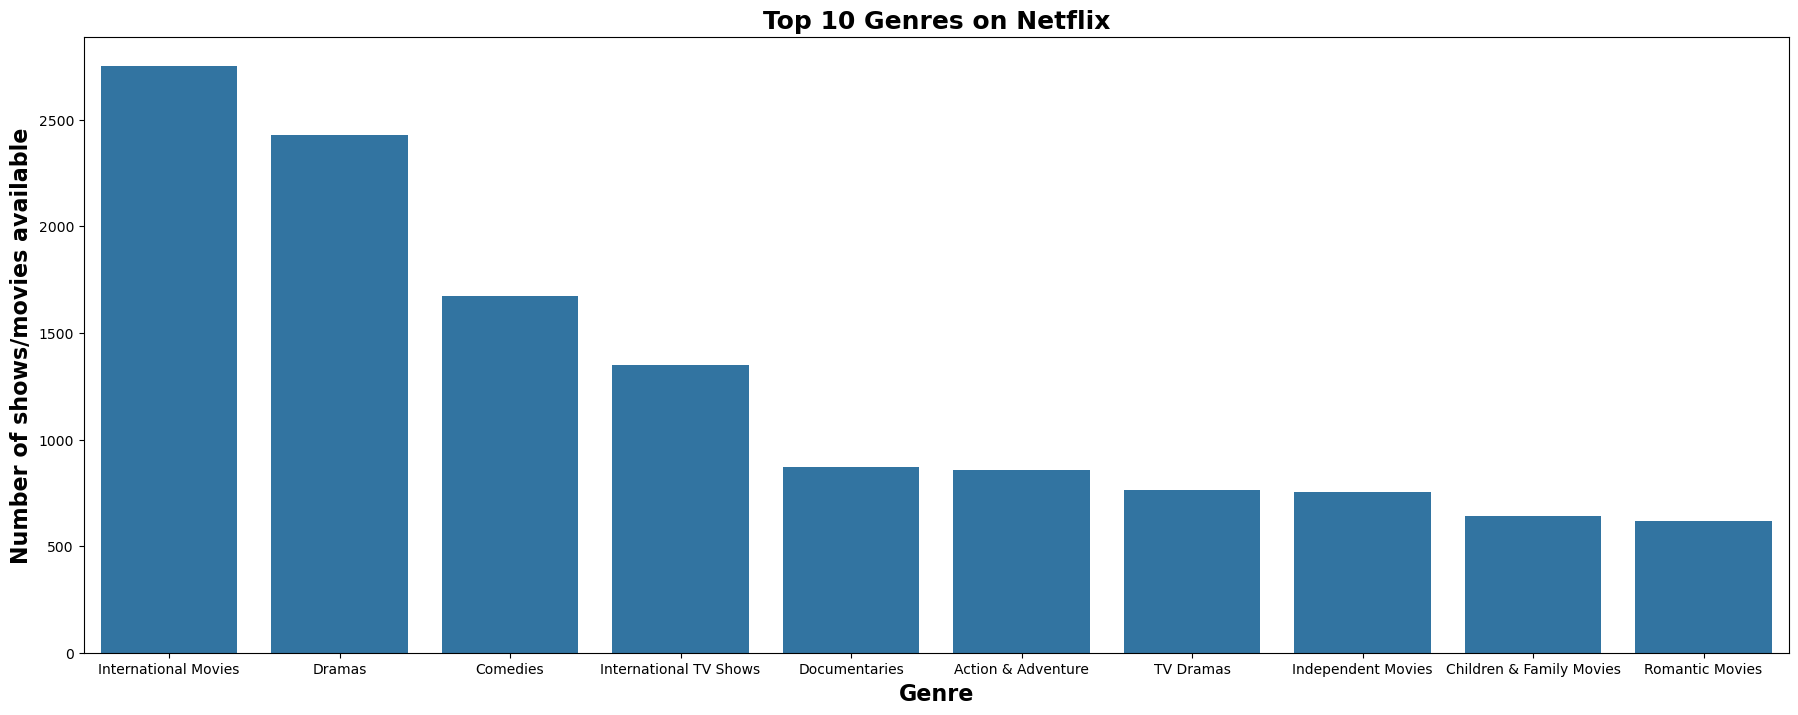

In [78]:
#create a chart for different genre
top_genre=df['listed_in'].str.split(', ').explode()
top_genre=top_genre.value_counts().head(10)
plt.figure(figsize=(22,8))
sns.barplot(
    x=top_genre.index,
    y=top_genre.values
)
plt.xlabel("Genre", fontsize=16, fontweight='bold')
plt.ylabel("Number of shows/movies available", fontsize=16, fontweight='bold')
plt.title("Top 10 Genres on Netflix", fontsize=18, fontweight='bold')
plt.show()

- International Movies, Dramas, and Comedies dominate Netflix’s catalog.
- Drama emerges as a consistently high-performing genre across regions.
- The dominance of international genres highlights Netflix’s localization strategy.

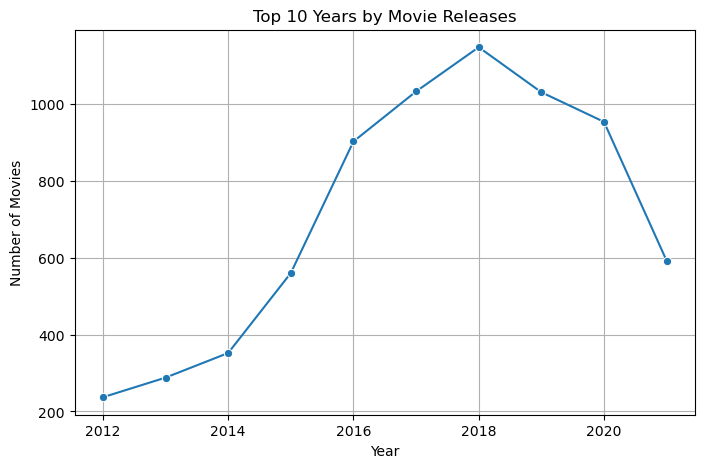

In [98]:
#checking which year has most TV shows/Movies released
count=df["release_year"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.lineplot(x=count.index, y=count.values, marker='o')
plt.title("Top 10 Years by Movie Releases")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

- Netflix’s content additions increased sharply after 2016.
- TV Shows have grown at a faster rate compared to Movies in recent years.
- This trend reflects Netflix’s aggressive investment in original and episodic content.

**Netflix EDA**

**Final Business Insights from Exploratory Data Analysis**

**1. Content Type Distribution**  
Netflix’s content library is predominantly **movie-focused**, however the **steady rise in TV shows over time** indicates a strategic shift toward **episodic and binge-watchable content**.  
This shift aligns with Netflix’s objective of **improving user engagement and long-term subscriber retention**, as TV series typically generate higher watch-time compared to standalone movies.

---

**2. Country-wise Content Contribution**  
The **United States, India, United Kingdom, and Japan** emerge as the top contributors to Netflix’s global content catalog.  
This highlights Netflix’s **strong reliance on US-produced content**, while also emphasizing its **increasing investment in high-growth international markets** such as India and Japan to support global expansion.

---

**3. Content Rating & Target Audience**  
A significant portion of Netflix’s catalog is rated **TV-MA, TV-14, R, and PG-13**, indicating that the platform primarily targets **mature and young-adult audiences (13+)**.

Key observations:
- Most content falls under **TV-MA and TV-14** ratings  
- Netflix prioritizes content with **mature themes and complex narratives**

This rating distribution suggests that Netflix positions itself as a **premium entertainment platform**, focusing on binge-oriented and high-engagement content rather than children-only programming.

---

**4. Genre Distribution**  
Genres such as **International Movies, Dramas, and Comedies** dominate Netflix’s catalog, followed by **International TV Shows, Documentaries, and Action & Adventure**.

The dominance of drama and international content reflects Netflix’s **localization strategy**, where region-specific storytelling helps attract and retain users across diverse geographic markets.

---

**5. Content Diversity & Platform Strategy**  
Netflix offers a **diverse mix of content**, including Documentaries, Family Movies, Romantic Movies, and Action-based titles.  
This variety demonstrates Netflix’s strategy to:
- Cater to multiple audience segments  
- Balance entertainment with informative content  
- Reduce dependency on a single genre or demographic group  

---

**Overall Strategic Takeaways**  
- Netflix’s catalog is **heavily US-centric**, but international content is expanding steadily  
- **TV shows have increased significantly after 2016**, indicating a shift toward original and long-form content  
- The platform primarily targets **mature and young-adult audiences**  
- **Drama and international content** form the core of Netflix’s global content strategy
